In [1]:
import numpy as np
import pandas as pd
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
arch = dn201
sz=320
bs = 32
path='data/hackerearth-myntra'

In [3]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.NO)

In [4]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=2)

In [5]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

100%|██████████| 428/428 [04:51<00:00,  1.47it/s]


In [6]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 1317/1709 [00:16<00:04, 80.80it/s, loss=5.49]

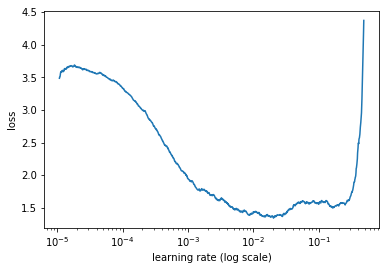

 77%|███████▋  | 1317/1709 [00:30<00:08, 43.85it/s, loss=5.49]

In [7]:
learn.sched.plot()

In [8]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 15%|█▍        | 256/1709 [00:05<00:33, 42.85it/s, loss=1.91]

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.354714   1.15095    0.67757   
    1      1.17829    1.075884   0.692319                      
    2      1.128127   1.039478   0.696262                      
    3      1.138161   1.010839   0.702833                      
    4      1.06604    0.998671   0.706484                      



[0.99867135, 0.70648364485981308]

In [9]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      1.056834   0.977617   0.711449  
    1      1.069199   0.954358   0.717728                      
    2      1.010306   0.947764   0.718385                      
    3      1.033261   0.936414   0.723788                       
    4      0.952881   0.929779   0.723861                       



[0.92977917, 0.72386098130841126]

In [10]:
learn.fit(0.0005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.954109   0.919687   0.72627   
    1      0.962513   0.918672   0.728023                       
    2      0.893735   0.913519   0.727804                       
    3      0.935378   0.908791   0.730943                       
    4      0.923462   0.903803   0.729702                       



[0.90380305, 0.72970210280373837]

In [11]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.90859    0.904104   0.729921  
    1      0.922412   0.906792   0.731016                       
    2      0.920108   0.90684    0.73255                        
    3      0.903449   0.90481    0.731162                       
    4      0.891647   0.904062   0.73087                        



[0.90406203, 0.73087032710280375]

In [12]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.920438   0.898284   0.732988  
    1      0.923328   0.898572   0.734886                      



[0.89857161, 0.73488609813084116]

In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [14]:
log_preds,y = learn.TTA()


In [15]:
probs = np.mean(np.exp(log_preds),0)

In [16]:
accuracy_np(probs, y)

0.73434299092771438

In [17]:
y[10]=9

In [18]:
predictions = np.argmax(probs,axis=1)

In [19]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[  98    3    1    0    3   12   17   35   79    0   10    0   35    0    0   55    3    0   24    7    2
     0   70    0]
 [   2   58    0    0    0    1    1    0   13    0    1    0    8    0    0    2    0    0    1    2    0
     0   35    0]
 [   4    0   23    0    2    0    2    0    5    0    0    0    0    0    0    3    0    0    2    0    0
     0    4    0]
 [   0    0    0   22    0    0    0    7    0    0    1    0    0    0    0   10    0    0    6    0    0
     0    0    0]
 [   2    0    0    0  290    1    0    3    2    0    1    0    0    0    0  152    0    0   40    0    1
     0   21    0]
 [  13    0    0    0    1  120   12   24   35    0    7    0    3    0    0   12    0    0    1    3    0
     0   41    0]
 [  15    0    0    0    2   11  176    6   34    0    2    0    5    0    0   18    0    0    4    1    0
     0   33    0]
 [  19    0    1    2    6   18    5  199   19    0    0    0    1    0    0   67    

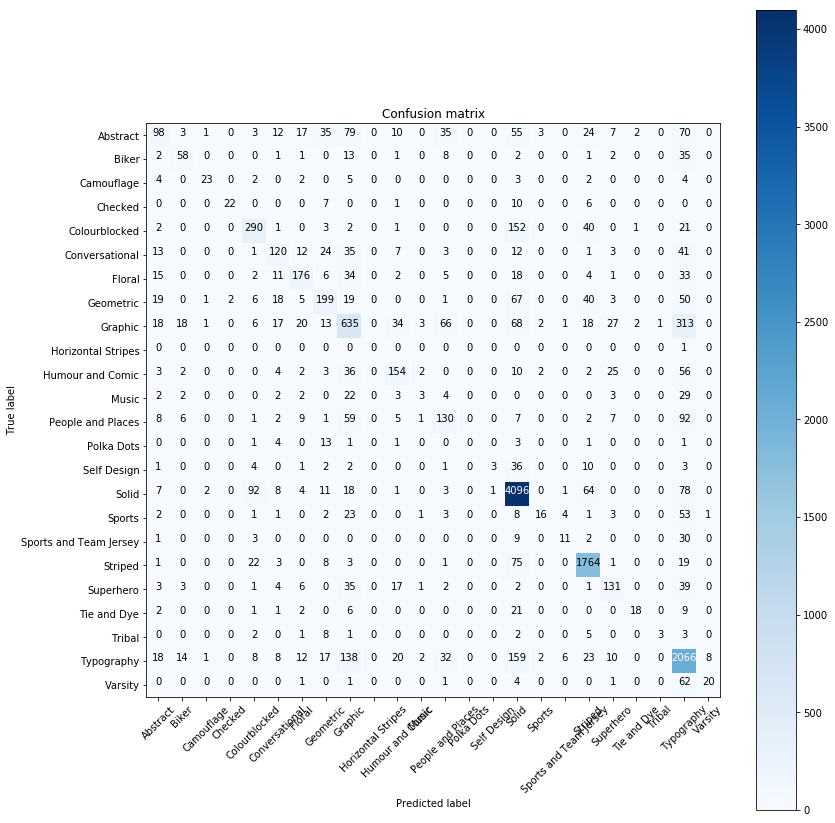

In [20]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.21586  0.00661  0.0022   0.       0.00661  0.02643  0.03744  0.07709  0.17401  0.       0.02203  0.
   0.07709  0.       0.       0.12115  0.00661  0.       0.05286  0.01542  0.00441  0.       0.15419  0.     ]
 [ 0.01613  0.46774  0.       0.       0.       0.00806  0.00806  0.       0.10484  0.       0.00806  0.
   0.06452  0.       0.       0.01613  0.       0.       0.00806  0.01613  0.       0.       0.28226  0.     ]
 [ 0.08889  0.       0.51111  0.       0.04444  0.       0.04444  0.       0.11111  0.       0.       0.       0.
   0.       0.       0.06667  0.       0.       0.04444  0.       0.       0.       0.08889  0.     ]
 [ 0.       0.       0.       0.47826  0.       0.       0.       0.15217  0.       0.       0.02174  0.       0.
   0.       0.       0.21739  0.       0.       0.13043  0.       0.       0.       0.       0.     ]
 [ 0.0039   0.       0.       0.       0.5653   0.00195  0.       0.00585  0.0039   0.       0.00195  0.    

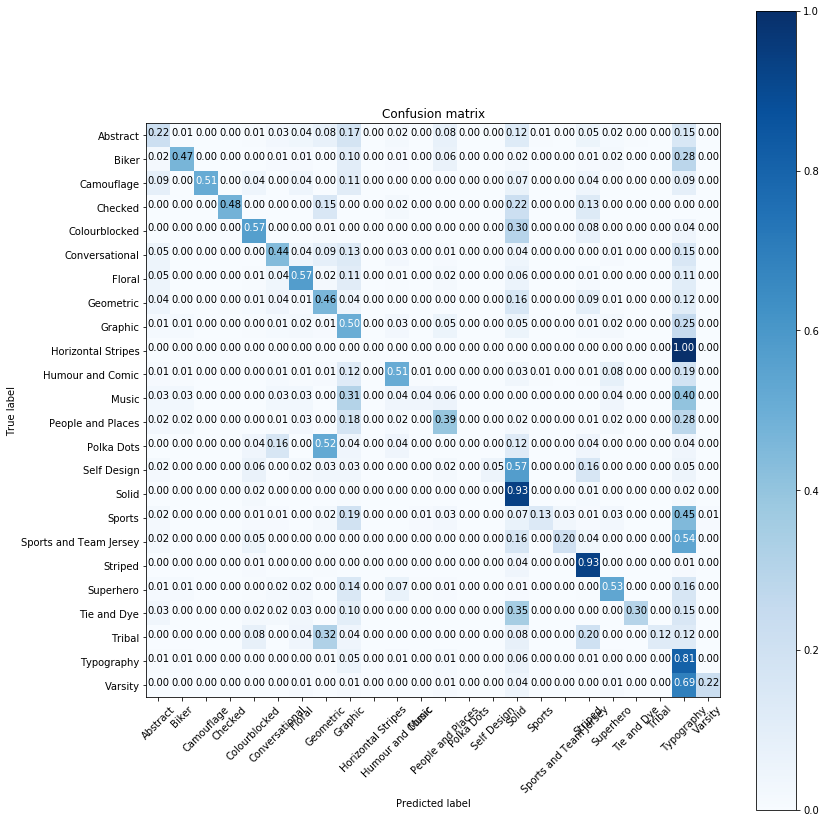

In [21]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

# 0.2 -> must overfit a bit 

In [22]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [23]:
lrf = learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 80%|████████  | 1371/1709 [00:14<00:03, 91.79it/s, loss=5.03]

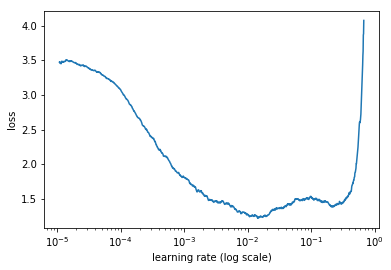

In [24]:
learn.sched.plot()

In [25]:
learn.fit(0.005,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 14%|█▍        | 238/1709 [00:04<00:29, 49.34it/s, loss=1.29]

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                      
    0      1.063244   0.974473   0.708674  
    1      1.006641   0.936735   0.721305                       
    2      0.843468   0.913524   0.72481                        
    3      0.82173    0.904731   0.733207                       
    4      0.813949   0.899994   0.735105                       



[0.8999939, 0.73510514018691586]

In [26]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.748628   0.888799   0.735105  
    1      0.690867   0.892929   0.740654                       



[0.89292938, 0.74065420560747663]

In [27]:
learn.fit(0.005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.726114   0.894658   0.741238  
    1      0.664492   0.898172   0.73788                        



[0.89817214, 0.73787967289719625]

In [28]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.543056   0.887491   0.746276  
    1      0.512746   0.877657   0.74854                        
    2      0.529811   0.875171   0.748029                       
    3      0.516699   0.880328   0.749124                      
    4      0.49061    0.87692    0.750511                       



[0.8769204, 0.75051109813084116]

In [29]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.545027   0.873062   0.750949  
    1      0.474937   0.874772   0.751606                       



[0.87477225, 0.75160630841121501]

In [38]:
learn.fit(0.0005,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.457725   0.880205   0.752409  
    1      0.479677   0.879004   0.751752                       



[0.87900376, 0.75175233644859818]

In [39]:
learn.fit(0.0001,2)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      0.463736   0.876045   0.752044  
    1      0.444575   0.870511   0.751387                       



[0.87051105, 0.75138726635514019]

In [40]:
log_preds,y = learn.TTA()


In [41]:
probs = np.mean(np.exp(log_preds),0)

In [42]:
accuracy_np(probs, y)

0.75102429031314022

In [43]:
y[10]=9

In [44]:
predictions = np.argmax(probs,axis=1)

In [45]:
cm = confusion_matrix(y, predictions)

Confusion matrix, without normalization
[[ 126    2    2    0    2    9   23   34   75    0   15    2   33    0    1   37    4    0   15    7    5
     1   61    0]
 [   5   66    0    0    0    1    1    0   14    0    1    0    5    0    0    1    0    0    0    2    1
     0   27    0]
 [   5    0   23    0    0    0    0    0    7    0    0    0    0    0    0    2    0    0    2    0    0
     0    5    1]
 [   2    0    0   24    0    0    0    7    0    0    0    0    0    0    0    9    0    0    4    0    0
     0    0    0]
 [   3    0    0    0  289    1    1    7    2    0    3    0    0    0    0  160    0    0   32    0    1
     0   14    0]
 [  15    0    1    0    1  122   13   25   33    0   11    0    1    0    0   11    1    0    1    4    0
     0   33    0]
 [  23    0    0    0    0    9  187    6   26    0    2    0    8    0    0   14    0    0    2    0    0
     0   30    0]
 [  28    0    1    4    6   23    7  205   21    0    1    0    2    0    3   57    

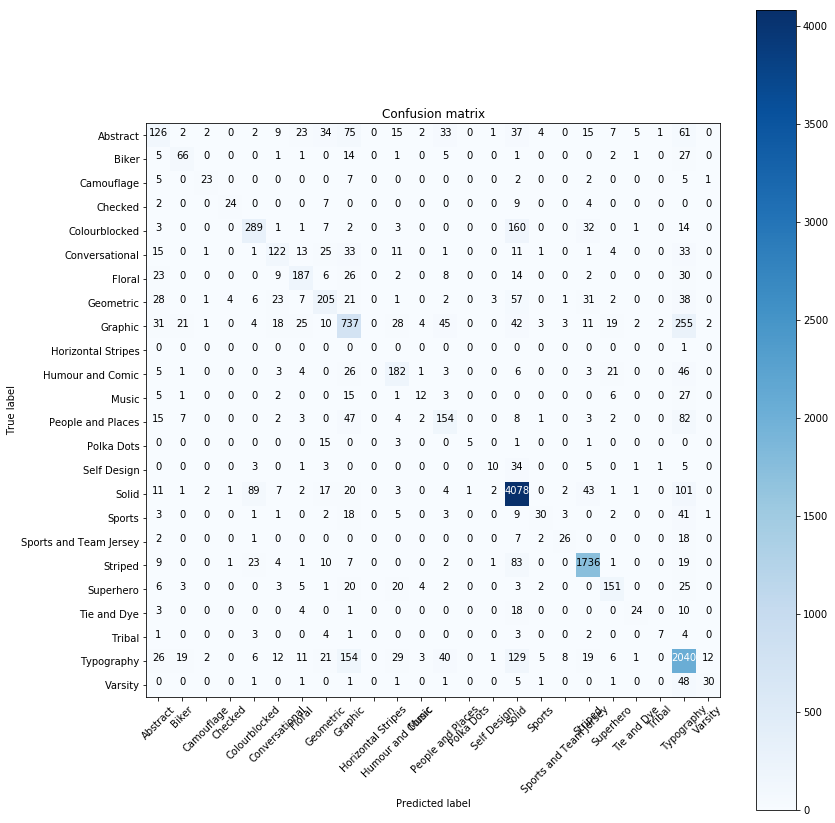

In [46]:
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

Normalized confusion matrix
[[ 0.27753  0.00441  0.00441  0.       0.00441  0.01982  0.05066  0.07489  0.1652   0.       0.03304  0.00441
   0.07269  0.       0.0022   0.0815   0.00881  0.       0.03304  0.01542  0.01101  0.0022   0.13436  0.     ]
 [ 0.04032  0.53226  0.       0.       0.       0.00806  0.00806  0.       0.1129   0.       0.00806  0.
   0.04032  0.       0.       0.00806  0.       0.       0.       0.01613  0.00806  0.       0.21774  0.     ]
 [ 0.11111  0.       0.51111  0.       0.       0.       0.       0.       0.15556  0.       0.       0.       0.
   0.       0.       0.04444  0.       0.       0.04444  0.       0.       0.       0.11111  0.02222]
 [ 0.04348  0.       0.       0.52174  0.       0.       0.       0.15217  0.       0.       0.       0.       0.
   0.       0.       0.19565  0.       0.       0.08696  0.       0.       0.       0.       0.     ]
 [ 0.00585  0.       0.       0.       0.56335  0.00195  0.00195  0.01365  0.0039   0.       0.00585  0

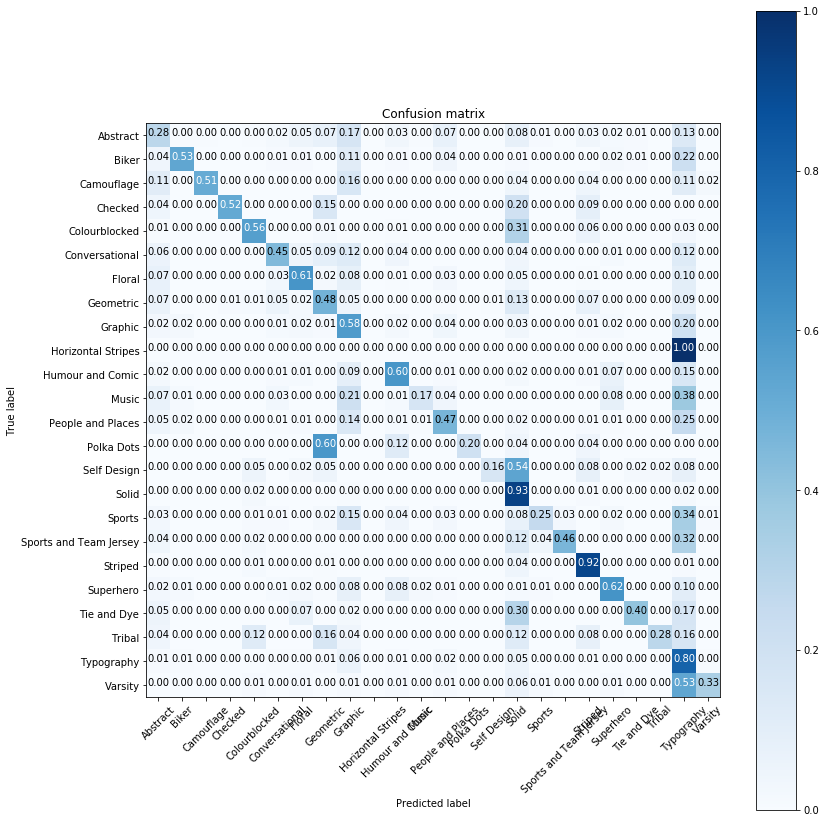

In [47]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)